# Notes on Color-blindness

https://en.wikipedia.org/wiki/Cone_cell

Three types of cone cells, each having some peak absorption around a wavelength
|Cone|Peak Wavelength|
|--|--|
|L(ong)|560 nm|
|M(edium)| 530 nm |
|S(short)| 420 nm|

## some useful links

https://www.britannica.com/science/red-color

https://en.wikipedia.org/wiki/CIE_1931_color_space#Grassmann's_Laws

https://en.wikipedia.org/wiki/Cone_cell

## Theory
1. Light of some wavelength enters the eye
1. The cones pick up the light
	- sensed light is $ sensitivity = absorption * intensity = A(\omega) * I(\omega) $
	- perhaps luminosity can be written as $L = \sum^t_c S_C(\omega) $ where $S_c$ is the sensitivity of color-cones S, M, and L
1. Somehow translate this into Hue, Saturation, Luminance (HSL)
1. Convert this into RGB

> Is there an analytical conversion from this origin into RGB?
> How to implement color perception depression?

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

https://en.wikipedia.org/wiki/CIE_1931_color_space#Grassmann's_Laws

The CIE's color matching functions $\bar x(\lambda)$, $\bar y(\lambda)$, and $\bar z(\lambda)$ are the numerical description of the chromatic response of the observer. They can be thought of as the spectral sensitivity curves of the three linear light detectors yielding the CIE tristimulus values, $X$, $Y$, and $Z$. Collectively, these three functions describe the CIE strandard observer.

Analytical Approximation:

In [17]:
def g(x, mu, t1, t2):
	arg = np.power(x-mu,2)/2
	g_l = (x< mu) * np.exp(-t1**2 * arg)
	g_r = (x>=mu) * np.exp(-t2**2 * arg)

	return g_l + g_r

Text(0.5, 1.0, 'CIE XYZ standard color observer color matching function')

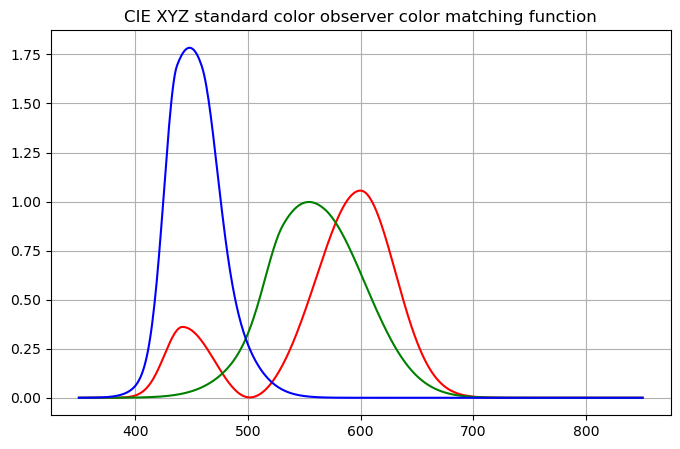

In [36]:
lmbda = np.linspace(350,850,501)

x_bar = 1.056*g(lmbda, 599.8, 0.0264, 0.0323) +\
		0.362*g(lmbda, 442.0, 0.0624, 0.0374) -\
        0.065*g(lmbda, 501.1, 0.0490, 0.0382)

y_bar = 0.821*g(lmbda, 568.8, 0.0213, 0.0247) +\
		0.286*g(lmbda, 530.9, 0.0613, 0.0322)

z_bar = 1.217*g(lmbda, 437.0, 0.0845, 0.0278) +\
		0.681*g(lmbda, 459.0, 0.0385, 0.0725)


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(lmbda, x_bar, color = 'r')
ax.plot(lmbda, y_bar, color = 'g')
ax.plot(lmbda, z_bar, color = 'b')

ax.grid()
ax.set_title('CIE XYZ standard color observer color matching function',)